# Practical work 4: Frequency filtering, color

# Practical work 4: Frequency filtering, color

In [17]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift, ifftshift
import matplotlib.pyplot as plt
from PIL import Image

barb = np.array(Image.open("img/barbara.png"))

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

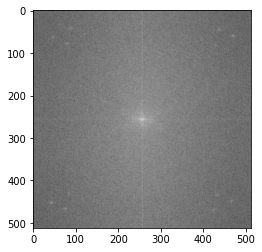

In [2]:
mand = np.array(Image.open("img/mandrill.png"))
plt.imshow(np.log(fftshift(np.abs(fft2(mand)))), cmap="gray")


2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [8]:
def idealLowPassFilter(n,m,fc):
    v, u = np.meshgrid(np.arange(n), np.arange(m))
    d0 = np.sqrt(pow(u-m/2,2)+pow(v-n/2, 2))
    kernel = np.float64(d0 <= fc)
    return kernel

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

In [9]:
def lowPass(I,fc):
    ft = fftshift(fft2(I))
    multiplied = np.multiply(ft, idealLowPassFilter(I.shape[0], I.shape[1], fc))
    reverse = np.absolute(ifft2(ifftshift(multiplied)))
    return reverse

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


Text(0.5, 1.0, 'Mandrill FC 10')

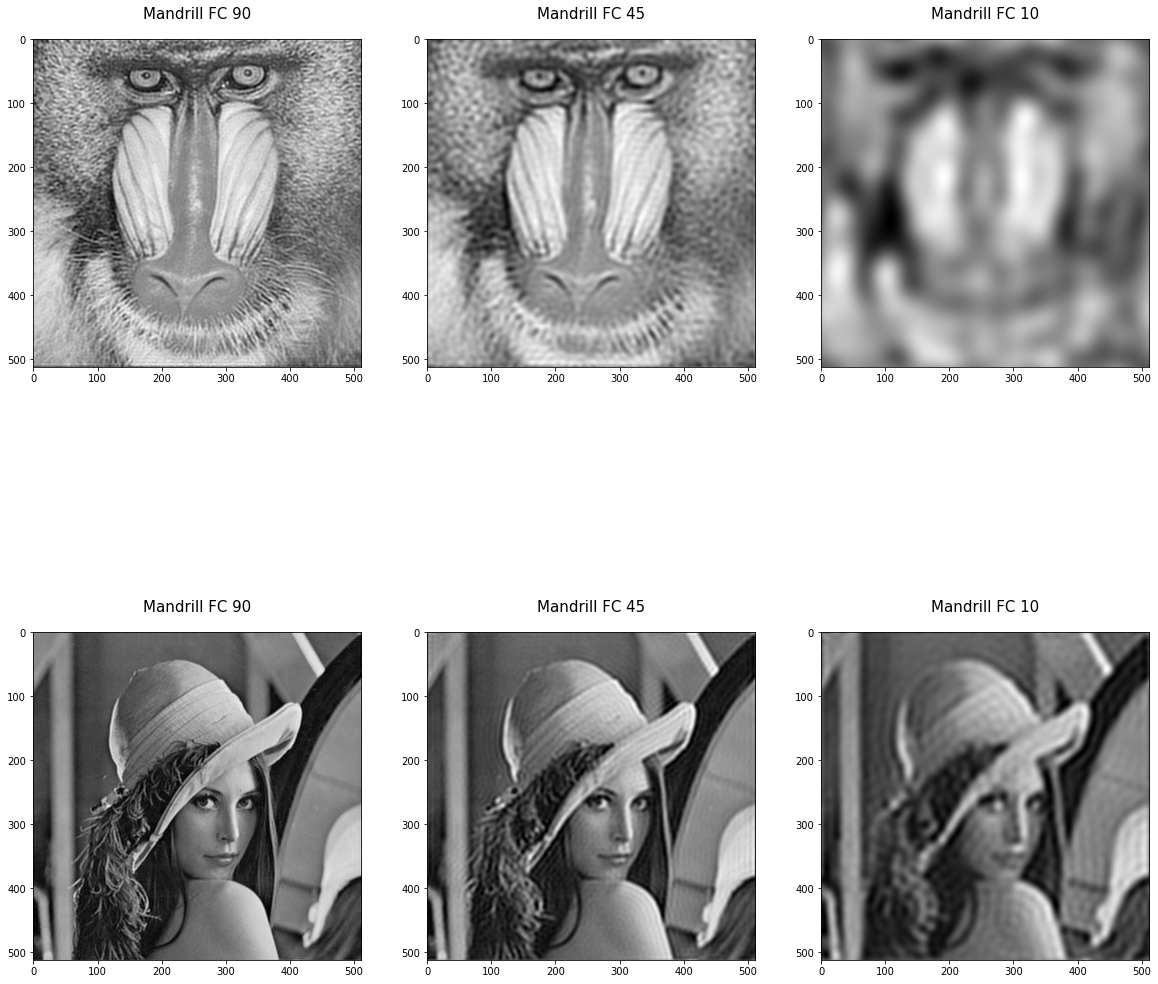

In [11]:
lena = np.array(Image.open("img/lena.jpg"))


fig, ax = plt.subplots(2,3, figsize =(20,20))
ax[0,0].imshow(lowPass(mand, 90), cmap="gray")
ax[0,0].set_title("Mandrill FC 90", fontsize=15, pad=20)
ax[0,1].imshow(lowPass(mand, 45),  cmap="gray")
ax[0,1].set_title("Mandrill FC 45", fontsize=15, pad=20)
ax[0,2].imshow(lowPass(mand, 10),  cmap="gray")
ax[0,2].set_title("Mandrill FC 10", fontsize=15, pad=20)
ax[1,0].imshow(lowPass(lena, 120),  cmap="gray")
ax[1,0].set_title("Mandrill FC 90", fontsize=15, pad=20)
ax[1,1].imshow(lowPass(lena, 60),  cmap="gray")
ax[1,1].set_title("Mandrill FC 45", fontsize=15, pad=20)
ax[1,2].imshow(lowPass(lena, 30),  cmap="gray")
ax[1,2].set_title("Mandrill FC 10", fontsize=15, pad=20)

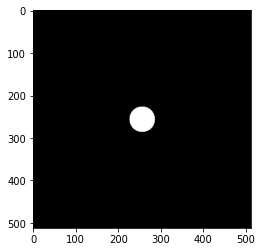

In [13]:
ft = fftshift(fft2(mand))
low_pass = idealLowPassFilter(mand.shape[0], mand.shape[1], 30)
plt.imshow(low_pass, cmap="gray")



As we decrease FC the picture gets much blurrier. Small details are removed.
These filters can be used to smooth and reduce noise in images. They are also used to reduce the intensity
variance between pixels.


## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

d/2 rounded down to the nearest smaller integer. This many rows and column must be added to each side of the image. 

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

In [14]:
def imagePad(I,h):
    padded = np.zeros(( I.shape[0] + (h.shape[0]//2)*2,I.shape[1] + (h.shape[0]//2)*2))
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            padded[i+ h.shape[0]//2][j+h.shape[0]//2] = I[i][j]
    return padded

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [15]:
def conv2(I,h):
    img = imagePad(I,h)
    res = np.zeros((I.shape))
    for i in range(I.shape[0]):
        for j in range (I.shape[1]):
            multiplication = np.multiply(img[i: i + h.shape[0], j: j+ h.shape[0]], h)
            res[i,j] = np.sum(multiplication)
    return res

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

Text(0.5, 1.0, '1/9 Filter: ')

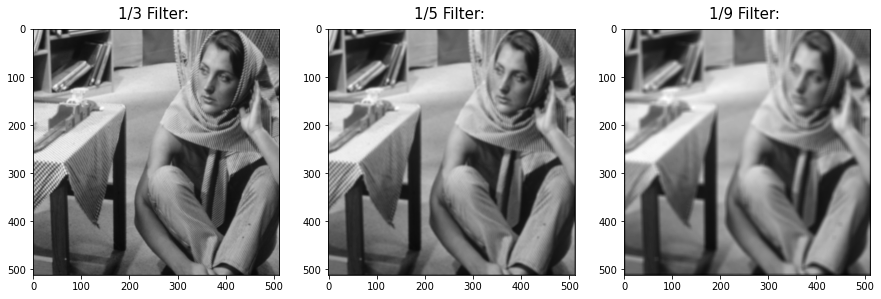

In [18]:
f3 =np.full((3,3), 1/3)
f5 = np.full((5,5), 1/5)
f9 = np.full((9,9), 1/9)

img3 = conv2(barb,f3)
img5 = conv2(barb, f5)
img9 = conv2(barb, f9)

fig, arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
arr[0].imshow(img3, cmap="gray")
arr[0].set_title('1/3 Filter: ', fontsize=15, pad=10)
arr[1].imshow(img5, cmap="gray")
arr[1].set_title("1/5 Filter: ", fontsize=15, pad=10)
arr[2].imshow(img9, cmap="gray")
arr[2].set_title("1/9 Filter: ", fontsize=15, pad=10)

The more we increase the filter size the blurrier the image gets and so much of the fine details are lost because the pixel values change more significantly as a result of the operations.

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

C:\Users\mojan\AppData\Local\Temp/ipykernel_13472/4253527692.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  padded[i+ h.shape[0]//2][j+h.shape[0]//2] = I[i][j]


Text(0.5, 1.0, '1/9 Mean Filter and Convolved: ')

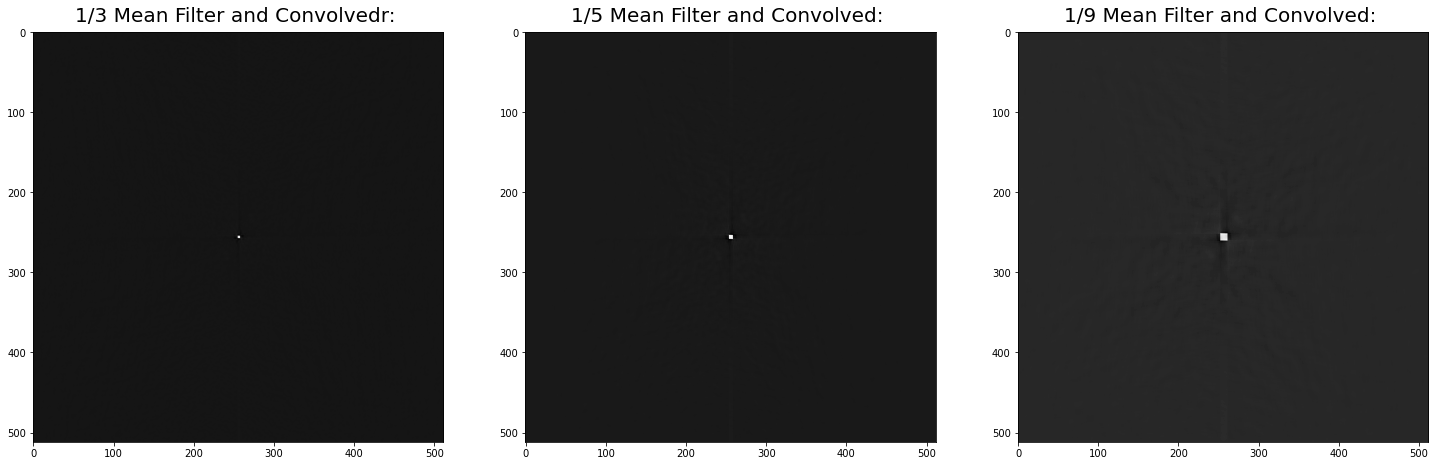

In [19]:
f512 = np.full((256,256), 0)
f3_pad = imagePad(f3,f512)
f5_pad = imagePad(f5,f512)
f9_pad = imagePad(f9,f512)
img = fftshift((fft2(mand)))
convolved3 = (conv2(img, f3_pad))
convolved5 = (conv2(img, f5_pad))
convolved9 = (conv2(img, f9_pad))

fig, arr = plt.subplots(nrows=1, ncols=3, figsize=(25,25))
arr[0].imshow(convolved3, cmap="gray")
arr[0].set_title('1/3 Mean Filter and Convolvedr: ', fontsize=20, pad=10)
arr[1].imshow(convolved5, cmap="gray")
arr[1].set_title("1/5 Mean Filter and Convolved: ", fontsize=20, pad=10)
arr[2].imshow(convolved9, cmap="gray")
arr[2].set_title("1/9 Mean Filter and Convolved: ", fontsize=20, pad=10)


6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

The transfer function of these mean filters is square shaped. Some details are lost therefore it is not an ideal low pass filter

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

Text(0.5, 1.0, '1/9 Gaussian Filter: ')

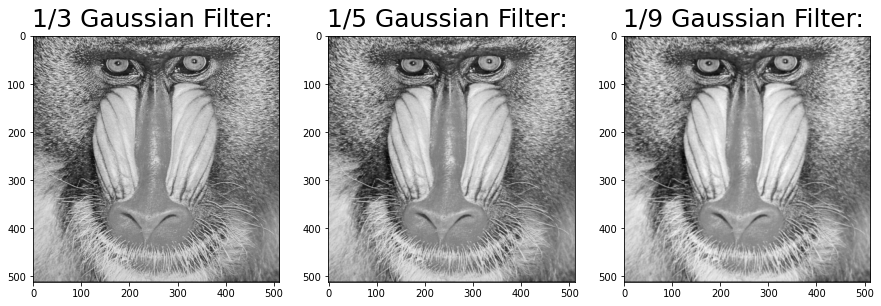

In [21]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()

gaus3 = conv2(mand,gaussianKernel(0.3))
gaus5 = conv2(mand,gaussianKernel(0.5))
gaus7 = conv2(mand,gaussianKernel(0.7))

fig, arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
arr[0].imshow(gaus3, cmap="gray")
arr[0].set_title('1/3 Gaussian Filter: ', fontsize=25, pad=10)
arr[1].imshow(gaus5, cmap="gray")
arr[1].set_title("1/5 Gaussian Filter: ", fontsize=25, pad=10)
arr[2].imshow(gaus7, cmap="gray")
arr[2].set_title("1/9 Gaussian Filter: ", fontsize=25, pad=10)

 The gaussian filter has a blurring effect as well but it preserves edge while removing noise and not much of the fine details are lost.
 Mean filter is not a good filter for frequency domain, with little ability to separate one band of frequencies from another. Gaussian filter has better performance in frequency domain.

## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

Text(0.5, 1.0, 'Sampled')

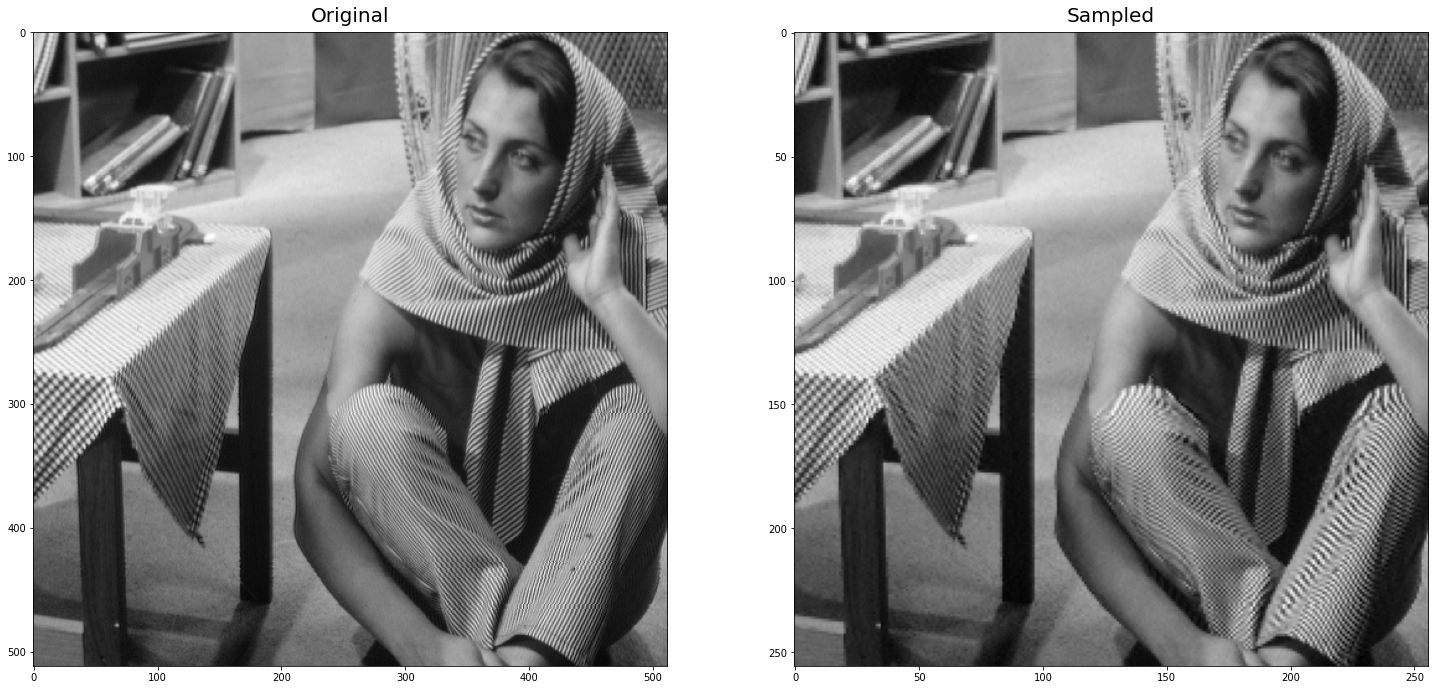

In [22]:
barb = np.array(Image.open("img/barbara.png"))
def subSample2(I):
    return I[::2,::2]

sampled_barb = subSample2(barb)

fig, ax = plt.subplots(1,2,figsize=(25,25))
ax[0].imshow(barb, cmap="gray")
ax[0].set_title("Original", fontsize=20, pad=10)
ax[1].imshow(sampled_barb, cmap="gray")
ax[1].set_title("Sampled", fontsize=20, pad=10)


2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

Text(0.5, 1.0, 'Filtered')

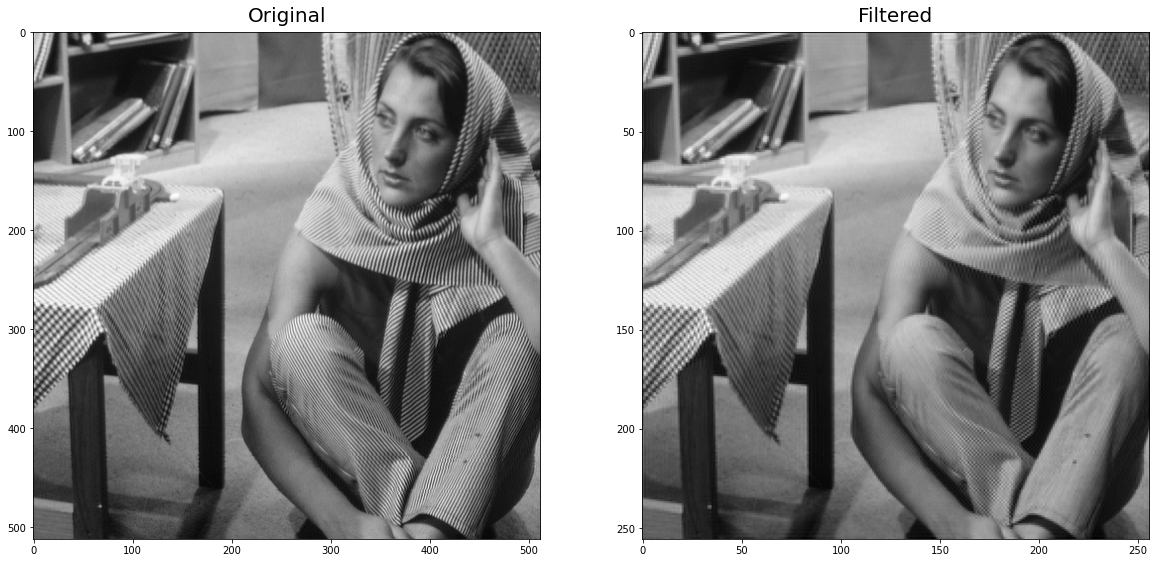

In [23]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A

ft = fftshift(fft2(barb))
kernel = antiAliasingFilter(barb.shape[0], barb.shape[1])
conv = np.multiply(ft, kernel)
reverse_ft = np.abs(ifft2(ifftshift((conv))))
filtered = subSample2(reverse_ft)

fig, ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(barb, cmap="gray")
ax[0].set_title("Original", fontsize=20, pad=10)
ax[1].imshow(filtered, cmap="gray")
ax[1].set_title("Filtered", fontsize=20, pad=10)


3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

Sampling without using the antialiasing filter leads to antialiasing effect especially in the areas with striped patterns. But if we apply the anti-aliasing filter before sampling, the jaggedness of the image reduces and the patterns start to look smoother and somewhat not visible. This is achieved by blending the pixels on the edges by multiplying the with filter.

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

Text(0.5, 1.0, 'I2 size: (512, 512)')

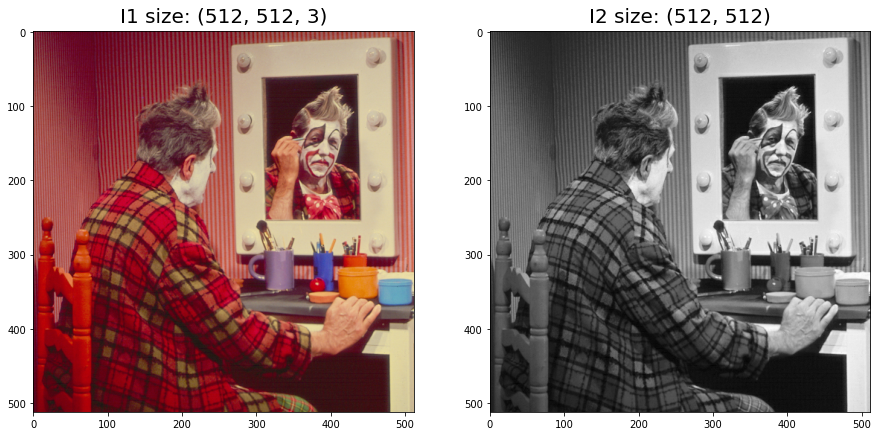

In [24]:
I1 = np.array(Image.open("img/clown.bmp"))
I2 = np.array(Image.open("img/clown_lumi.bmp"))
fig, arr = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
arr[0].imshow(I1, cmap="gray")
arr[0].set_title('I1 size: ' + str(I1.shape), fontsize=20, pad=10)
arr[1].imshow(I2, cmap="gray")
arr[1].set_title("I2 size: " + str(I2.shape), fontsize=20, pad=10)

 The clown_lumi image is a two dimensional array, in which each number represents a pixel and the
  value of the number is the intensity of the light in that pixel.
  The clown.bmp image is a three dimensional array and each pixel is made up of three channels, with 
  each channel representing a colour

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

You can see that the regions 
containing red colour in the original 
image are lighter in the red channel image. 
This simply means that, regions which contribute more to the red colour of the original 
image are lighter in the grayscale image of the red channel. 
And the regions which contribute less or do not contribute are dark.

" we split up the channels.\nThe pixels in each image have only one channel now.\nA single channel alone will always show as grayscale.\nThe regions which contribute more to the one of the the 3 colours of the original \nimage are lighter in the grayscale image of the that specific color channel. \nFor example in the red channel, most regions are white, meaning that the color red has contributed a lot to\nthe original image in these areas. Or in the green channel, it can be observed that some areas are very \ndark, meaning that the color green didn't contribute a lot to the original image in these areas.\n"

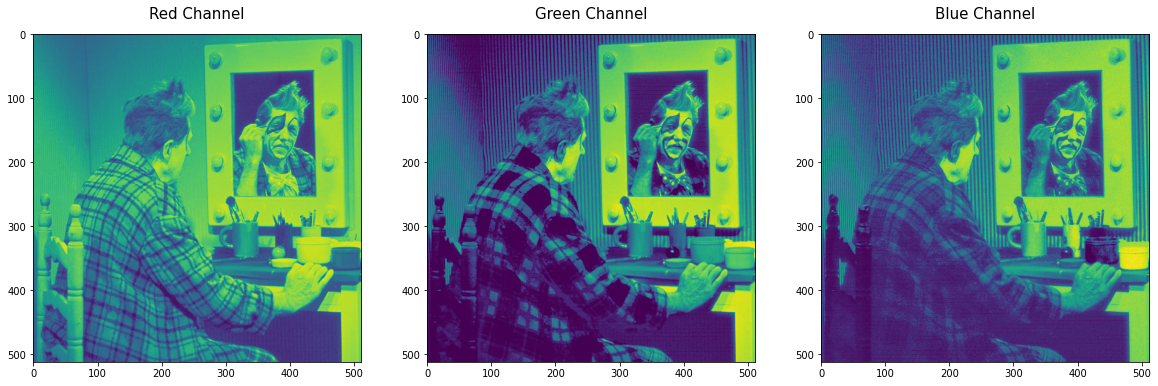

In [26]:
r = I1[:,:,0]
g = I1[:,:,1]
b = I1[:,:,2]
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(r, cmap ="gray")
ax[0].set_title("Red Channel", fontsize=15, pad=15)
ax[1].imshow(g, cmap ="gray")
ax[1].set_title("Green Channel", fontsize=15, pad=15)
ax[2].imshow(b, cmap ="gray")
ax[2].set_title("Blue Channel", fontsize=15, pad=15)

""" we split up the channels.
The pixels in each image have only one channel now.
A single channel alone will always show as grayscale.
The regions which contribute more to the one of the the 3 colours of the original 
image are lighter in the grayscale image of the that specific color channel. 
For example in the red channel, most regions are white, meaning that the color red has contributed a lot to
the original image in these areas. Or in the green channel, it can be observed that some areas are very 
dark, meaning that the color green didn't contribute a lot to the original image in these areas.
"""


3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

In [59]:
def normalizeImage(I,k1,k2):
    oldmin = np.amin(I)
    oldmax = np.amax(I)
    oldrange = oldmax - oldmin
    newmin = k1
    newmax = k2
    newrange = newmax - newmin
    h,w = I.shape
    array = np.empty([h, w])
    for i in range(h):
        for j in range(w):
            scale = (I[i][j] - oldmin)/oldrange
            array[i][j]=(newrange*scale)+newmin
    return array

normR = normalizeImage(r, 0,1)
normB = normalizeImage(b, 0,1)
normG = normalizeImage(g, 0,1)

Text(0.5, 1.0, 'BGR Combo')

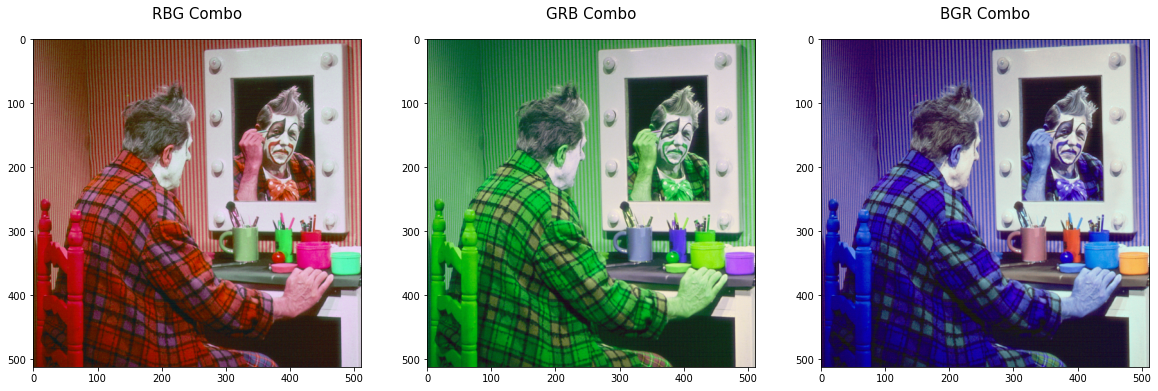

In [62]:
I3 = np.dstack((normR,normB,normG))
I4 = np.dstack((normG,normR,normB))
I5 = np.dstack((normB,normG,normR))

fig, ax = plt.subplots(1,3, figsize =(20,20))
ax[0].imshow(I3)
ax[0].set_title("RBG Combo", fontsize=15, pad=20)
ax[1].imshow(I4)
ax[1].set_title("GRB Combo", fontsize=15, pad=20)
ax[2].imshow(I5)
ax[2].set_title("BGR Combo", fontsize=15, pad=20)


4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

Text(0.5, 1.0, 'Blue Channel')

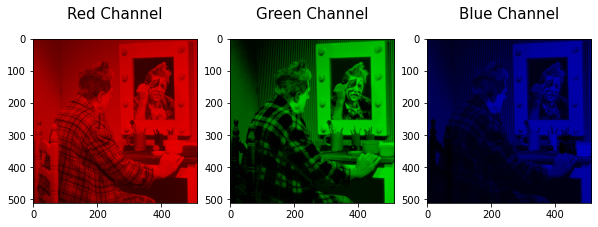

In [83]:
#red channel
testR =np.copy(I1)
testR[:,:,1] = 0
testR[:,:,2] = 0

# #red channel
testG =np.copy(I1)
testG[:,:,0] = 0
testG[:,:,2] = 0

testB =np.copy(I1)
testB[:,:,0] = 0
testB[:,:,1] = 0

fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(testR)
ax[0].set_title("Red Channel", fontsize=15, pad=20)
ax[1].imshow(testG)
ax[1].set_title("Green Channel", fontsize=15, pad=20)
ax[2].imshow(testB)
ax[2].set_title("Blue Channel", fontsize=15, pad=20)